# Capstone Project

In [1]:
#import packages needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pandas as pd
import seaborn as sns
import random

In [5]:
#setting random seed
random.seed(11149287)

In [6]:
#loading data
data = pd.read_csv('musicData.csv')

### Exploratory Data Analysis

In [7]:
#viewing first 4 rows of the data
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [8]:
#checking shape of the data
data.shape

(50005, 18)

In [9]:
#getting info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [10]:
#checking for null values
data.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [11]:
#since there are only 5 null values, we can drop them
data = data.dropna()
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [12]:
#resetting index of dataframe
data.reset_index(inplace=True, drop=True)

In [13]:
#re-checking for null values
data.isnull().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [14]:
#counting number on instances of string data in the tempo variable
c = 0 
for i in range(len(data)): 
    if data['tempo'].iloc[i] == '?': 
        c += 1
print('There are',c,'rows with a "?" in the tempo column.')

There are 4980 rows with a "?" in the tempo column.


In [15]:
#since this is just 10% of the dataset 
#we impute those values using the mean
data['tempo'] = data['tempo'].apply(lambda x: np.nan if x == '?' else x) 
data['tempo'] = pd.to_numeric(data['tempo'])
data['tempo'].fillna(value = data['tempo'].mean(), inplace = True)

In [16]:
#counting number on instances of negative values in the duration variable
count = 0 
for i in range(len(data)): 
    if data['duration_ms'].iloc[i] == -1.0: 
        count += 1
print('There are',count,'rows with a negative value for the duration')

There are 4939 rows with a negative value for the duration


In [17]:
#since this is just 10% of the dataset 
#we impute those values using the mean
data['duration_ms'] = data['duration_ms'].apply(lambda x: np.nan if x == -1.0 else x) 
data['duration_ms'].fillna(value = data['duration_ms'].mean(), inplace = True)

In [18]:
#we replace the category labels of the genres with numeric labels
data['music_genre'].replace(['Electronic','Anime','Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop'],
                        [0,1,2,3,4,5,6,7,8,9], inplace=True)

### Data Exploration & Visualization

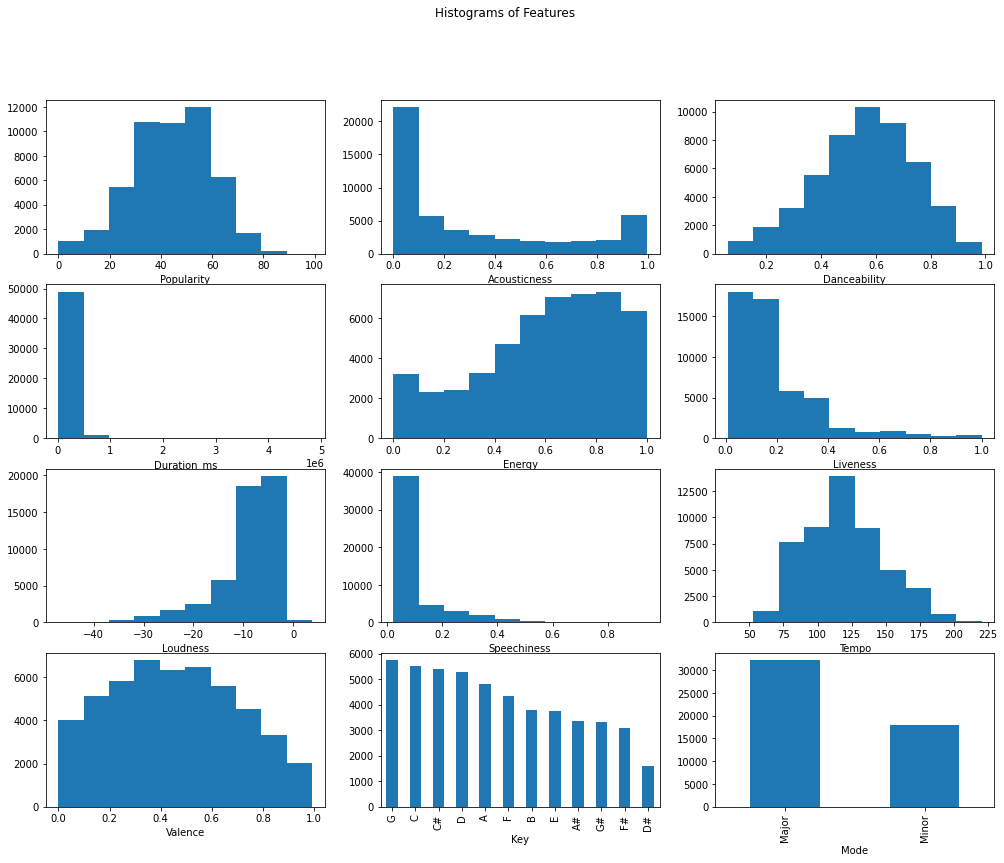

In [19]:
#viewing histogram of all features
#setting figure size and title
plt.figure(figsize = (17,13))
plt.suptitle('Histograms of Features')

#plotting histogram for Popularity
plt.subplot(4,3,1)
plt.hist(data['popularity'])
plt.xlabel('Popularity')

#plotting histogram for Acousticness
plt.subplot(4,3,2)
plt.hist(data['acousticness'])
plt.xlabel('Acousticness')

#plotting histogram for Danceability
plt.subplot(4,3,3)
plt.hist(data['danceability'])
plt.xlabel('Danceability')

#plotting histogram for Duration
plt.subplot(4,3,4)
plt.hist(data['duration_ms'])
plt.xlabel('Duration_ms')

#plotting histogram for Energy
plt.subplot(4,3,5)
plt.hist(data['energy'])
plt.xlabel('Energy')

#plotting histogram for Liveness
plt.subplot(4,3,6)
plt.hist(data['liveness'])
plt.xlabel('Liveness')

#plotting histogram for Loudness
plt.subplot(4,3,7)
plt.hist(data['loudness'])
plt.xlabel('Loudness')

#plotting histogram for Speechiness
plt.subplot(4,3,8)
plt.hist(data['speechiness'])
plt.xlabel('Speechiness')

#plotting histogram for Temp
plt.subplot(4,3,9)
plt.hist(data['tempo'])
plt.xlabel('Tempo')

#plotting histogram for Valence
plt.subplot(4,3,10)
plt.hist(data['valence'])
plt.xlabel('Valence')

#plotting frequency of each cateogy for Key
plt.subplot(4,3,11)
data['key'].value_counts().plot(kind='bar')
plt.xlabel('Key')

#plotting frequency of each cateogy for Mode
plt.subplot(4,3,12)
data['mode'].value_counts().plot(kind='bar')
plt.xlabel('Mode')

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

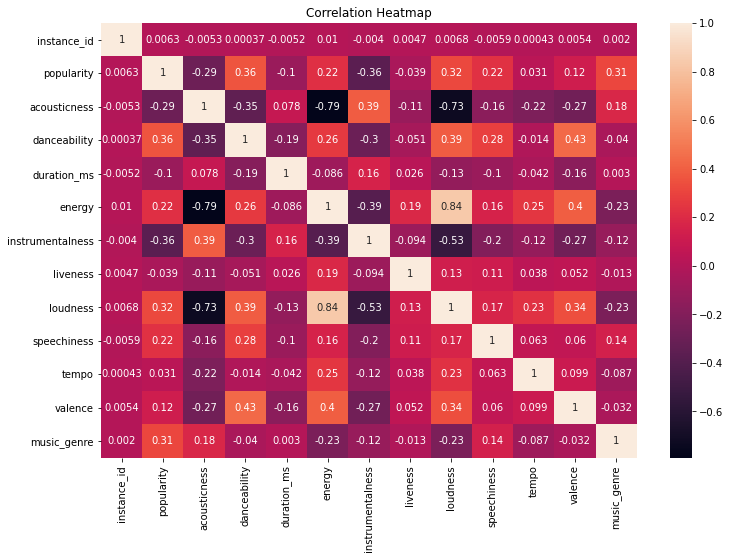

In [20]:
#plotting correlation heatmap
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Heatmap')

In [21]:
#dummy coding mode variable
mode = pd.get_dummies(data['mode'])
mode = mode.drop(['Minor'], axis = 1)

data = data.drop(['mode'], axis = 1)
data['major'] = mode

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,obtained_date,valence,music_genre,major
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245503.541466,0.941,0.79200,A#,0.115,-5.201,0.0748,100.889,4-Apr,0.759,0,0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,0.0300,115.002,4-Apr,0.531,0,0
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,0.0345,127.994,4-Apr,0.333,0,1
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,0.2390,128.014,4-Apr,0.270,0,1
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,0.0413,145.036,4-Apr,0.323,0,1


In [22]:
#checking the keys present
data['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [23]:
#number of keys
print('There are',len(data['key'].unique()), 'unique key values.')

There are 12 unique key values.


In [24]:
#we dropping information regarding artist, song id & date
#we also drop the key variable
data = data.drop(['instance_id','artist_name','track_name','obtained_date', 'key'], axis = 1)
 

### Data Processing, Scaling & Dimension Reduction

In [25]:
#getting X and Y data seperate
Y = data['music_genre']
X = data.drop(['music_genre'], axis = 1)

In [26]:
#viewing first 5 rows of X data
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,major
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,0
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,0
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,1
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,1
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,1


In [27]:
#viewing first 5 rows of Y data
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: music_genre, dtype: int64

In [28]:
#geting major, a categorical column, out
major = X['major']

In [29]:
#names of all numerical columns
numeric_cols = ['popularity','acousticness','danceability','duration_ms','energy',
                'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

In [30]:
#scaling all numeric input variables
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X.drop(['major'], axis = 1)), columns = numeric_cols)

In [31]:
#checking our scaled data
X_scaled.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-1.108003,-0.883886,0.524878,2.751216e-16,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.655673,1.225073
1,-0.850633,-0.860390,0.356933,-2.572242e-01,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170280,0.302431
2,-1.043661,-0.888632,0.345737,-2.825585e-01,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.276558,-0.498812
3,-0.657606,-0.823184,1.207853,-7.432841e-01,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.277246,-0.753752
4,-0.786291,-0.883974,0.446504,-2.186933e-01,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.862689,-0.539278


In [32]:
#adding back major, a categorical variable, to our scaled input data
X_scaled = pd.concat([X_scaled, major], axis = 1)
X_scaled.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,major
0,-1.108003,-0.883886,0.524878,2.751216e-16,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.655673,1.225073,0
1,-0.850633,-0.860390,0.356933,-2.572242e-01,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170280,0.302431,0
2,-1.043661,-0.888632,0.345737,-2.825585e-01,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.276558,-0.498812,1
3,-0.657606,-0.823184,1.207853,-7.432841e-01,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.277246,-0.753752,1
4,-0.786291,-0.883974,0.446504,-2.186933e-01,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.862689,-0.539278,1


### PCA

In [33]:
pca = PCA().fit(X_scaled)

#eigen values 
eig_vals = pca.explained_variance_
print('Eigen values are:',eig_vals)

#get eigen vectors - loadings 
loadings = pca.components_

#getting rotated data
X_pca = pca.transform(X_scaled)
print()
print('Shape of rotated data:',X_pca.shape)

Eigen values are: [3.70503662 1.34637165 1.0542264  0.97608348 0.9475073  0.82011585
 0.73195449 0.59686214 0.46037733 0.25710393 0.22370518 0.11072191]

Shape of rotated data: (50000, 12)


Text(0.5, 1.0, 'Number of Eigenvalues above 1')

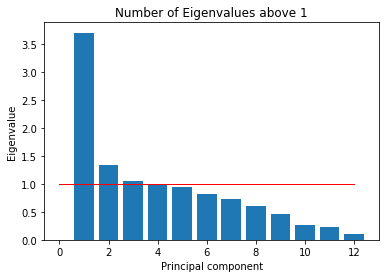

In [34]:
#using kaiser criterion
numClasses = 12
plt.bar(np.linspace(1,numClasses, numClasses),eig_vals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1)
plt.title('Number of Eigenvalues above 1')

In [35]:
#cumulative variance explained by number of predictor variables
cum_var = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative Variance:', cum_var)

Cumulative Variance: [0.32992117 0.44981108 0.54368643 0.63060342 0.71497578 0.78800437
 0.85318248 0.90633107 0.94732613 0.97022038 0.99014058 1.        ]


In [36]:
#setting colors for plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

In [37]:
#list with label names for plotting
label_names = ['Electronic','Anime','Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop']

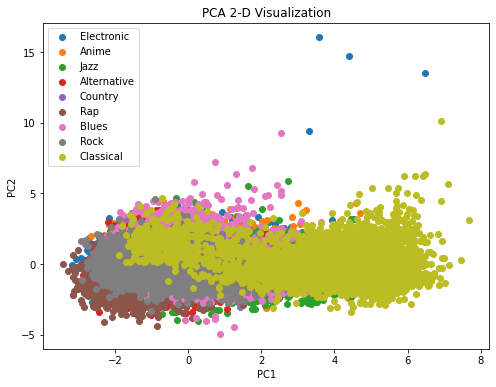

In [40]:
#plotting PCA in first 2 dimensions
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2,3,4,5,6,7,8,9], label_names):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], color=color,
                label=target_name)
plt.title('PCA 2-D Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper left')

In [41]:
#checking for first loadings 
loadings_interpretation = pd.DataFrame(loadings[:,0:2], columns = ['PC1','PC2'],index = X_scaled.columns)
loadings_interpretation

,PC1,PC2
popularity,-0.252112,0.423097
acousticness,-0.372606,-0.228327
danceability,0.195564,0.051138
duration_ms,0.423818,-0.168669
energy,-0.114146,-0.040385
instrumentalness,-0.199736,0.067756
liveness,0.369374,0.308388
loudness,-0.525707,0.139915
speechiness,0.335219,0.063140
tempo,-0.032972,-0.737408


### LDA

In [42]:
#fitting an LDA to the data since we have labels
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, Y)

LinearDiscriminantAnalysis()

In [43]:
#transforming X data based on LDA
X_lda = lda.transform(X_scaled)

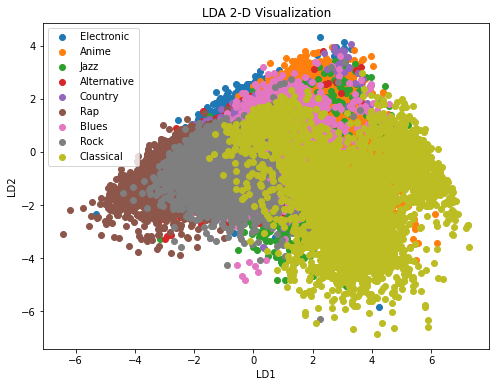

In [44]:
#Plotting 2 dimensions of the LDA
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label_names):
    plt.scatter(X_lda[Y == i, 0], X_lda[Y == i, 1], color=color,
                label=target_name)
    
plt.title('LDA 2-D Visualization')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc = 'upper left')

### Training & Test Datasets

In [46]:
#we choose PCA data for further analysis 
#we pick the first 7 columns for a cumulative variance explained of 85% 
rotated = pd.DataFrame(X_pca[:,0:7], columns = ['component1','component2','component3','component4','component5','component6','component7'])

#adding back Y to input data to ensure even split
rotated['genre'] = Y
rotated.head()

,component1,component2,component3,component4,component5,component6,component7,genre
0,-0.646597,0.597712,-1.390696,-0.543135,1.272059,1.087031,-1.930273,0
1,-0.040788,0.858512,-1.365331,-0.334318,0.590636,0.669670,-1.963349,0
2,-0.998528,1.649002,0.658670,-1.171929,0.568274,-0.754595,0.035487,0
3,-1.397081,-0.461047,0.576607,-0.233515,-0.753680,0.169383,-1.352376,0
4,0.359505,0.978636,-0.909888,-0.172509,-0.489966,0.695949,-1.441818,0


In [47]:
#creating subsets for each genre type
electronic = rotated[rotated['genre'] == 0]
anime = rotated[rotated['genre'] == 1]
jazz = rotated[rotated['genre'] == 2]
alternative = rotated[rotated['genre'] == 3]
country = rotated[rotated['genre'] == 4]
rap = rotated[rotated['genre'] == 5]
blues = rotated[rotated['genre'] == 6]
rock = rotated[rotated['genre'] == 7]
classical = rotated[rotated['genre'] == 8]
hiphop = rotated[rotated['genre'] == 9] 

In [48]:
#splitting each subset into train and test data
train0, test0 = train_test_split(electronic, test_size = 0.1)
train1, test1 = train_test_split(anime, test_size = 0.1)
train2, test2 = train_test_split(jazz, test_size = 0.1)
train3, test3 = train_test_split(alternative, test_size = 0.1)
train4, test4 = train_test_split(country, test_size = 0.1)
train5, test5 = train_test_split(rap, test_size = 0.1)
train6, test6 = train_test_split(blues, test_size = 0.1)
train7, test7 = train_test_split(rock, test_size = 0.1)
train8, test8 = train_test_split(classical, test_size = 0.1)
train9, test9 = train_test_split(hiphop, test_size = 0.1) 

In [49]:
#cumulative train dataset
train = pd.concat([train0, train1, train2, train3, train4, train5, train6, train7, train8, train9], ignore_index = True)
train.head()

,component1,component2,component3,component4,component5,component6,component7,genre
0,-2.761565,-0.323964,1.383864,-1.037414,-0.830115,1.383469,-0.060326,0
1,-1.552437,-1.195608,-0.564419,0.562030,0.822194,0.312146,-0.366718,0
2,-1.104684,0.337275,0.440583,1.840632,0.771931,0.269875,-0.605448,0
3,0.613237,1.296930,-0.577228,1.655083,1.005341,1.982378,-1.666813,0
4,-0.952127,1.098771,-0.619418,0.696527,-1.613510,-0.184393,-0.350535,0


In [50]:
#cumulative test dataset
test = pd.concat([test0, test1, test2, test3, test4, test5, test6, test7, test8, test9], ignore_index = True)
test.head()

,component1,component2,component3,component4,component5,component6,component7,genre
0,-1.539041,0.907424,2.466662,-1.101758,-0.332158,-0.915338,-1.282356,0
1,1.252770,0.428445,-0.540720,-0.317677,-0.471468,-0.214617,-0.608743,0
2,-1.818567,0.764053,-0.416348,-0.412024,-0.719156,1.050844,-0.413549,0
3,0.616504,1.258164,-0.368197,0.757536,0.093259,0.499751,-1.747436,0
4,0.110773,0.922490,-0.387677,1.116078,0.231510,0.080348,-1.419008,0


In [51]:
#splitting train and test into feature and target variables
y_train = train['genre']
x_train = train.drop(['genre'], axis = 1)

y_test = test['genre']
x_test = test.drop(['genre'], axis = 1)

### Classification Models

#### Single Decision Tree

In [52]:
#hyper-parameter tuning for single decision tree
#we want to find the optimal maximum depth of the tree
training_validity = []
testing_validity = []
depth_range = [x for x in range(1,21)]
for maxd in depth_range: 
    model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = maxd, random_state = 42)
    model.fit(x_train, y_train)
    training_validity.append(model.score(x_train, y_train))
    testing_validity.append(model.score(x_test, y_test))

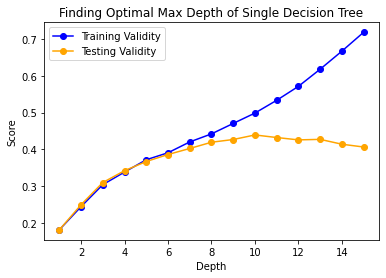

In [53]:
plt.figure(figsize=(6, 4))
plt.plot(depth_range[0:15], training_validity[0:15], color = 'blue', label = 'Training Validity',  marker = 'o')
plt.plot(depth_range[0:15], testing_validity[0:15], color = 'orange', label = 'Testing Validity', marker = 'o')
plt.legend(loc = 'upper left')
plt.title('Finding Optimal Max Depth of Single Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.show()

In [54]:
#viewing validity in tabular form
pd.DataFrame({'depth':depth_range, 'training validity':training_validity ,'testing validity':testing_validity})

,depth,training validity,testing validity
0,1,0.181156,0.1810
1,2,0.244222,0.2494
2,3,0.304000,0.3098
3,4,0.338289,0.3420
4,5,0.371822,0.3670
5,6,0.390756,0.3860
6,7,0.420200,0.4024
7,8,0.442133,0.4194
8,9,0.470489,0.4268
9,10,0.498733,0.4392


In [55]:
#train a decision tree classifier 
#with max depth 10 
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state = 42)
clf.fit(x_train,y_train) 
tree_pred = clf.predict(x_test)

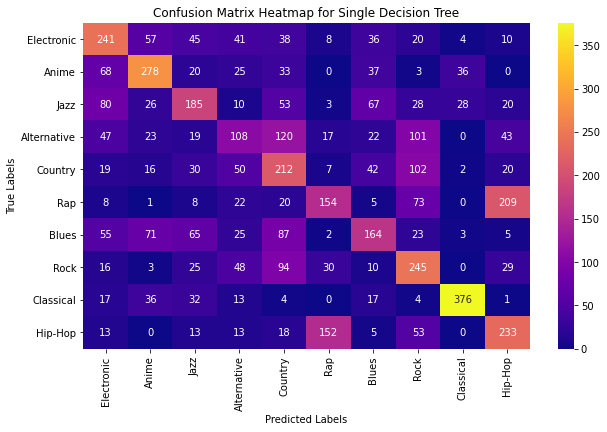

In [88]:
#confusion matrix heatmap
plt.figure(figsize = (10,6))
sns.heatmap(metrics.confusion_matrix(y_test, tree_pred), annot = True, xticklabels = label_names, yticklabels = label_names, cmap = 'plasma', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Single Decision Tree')
plt.show()

In [57]:
#confusion matrix
print(pd.crosstab(y_test, tree_pred, rownames=['Actual Genre'], colnames=['Predicted Genre']))

Predicted Genre    0    1    2    3    4    5    6    7    8    9
Actual Genre                                                     
0                241   57   45   41   38    8   36   20    4   10
1                 68  278   20   25   33    0   37    3   36    0
2                 80   26  185   10   53    3   67   28   28   20
3                 47   23   19  108  120   17   22  101    0   43
4                 19   16   30   50  212    7   42  102    2   20
5                  8    1    8   22   20  154    5   73    0  209
6                 55   71   65   25   87    2  164   23    3    5
7                 16    3   25   48   94   30   10  245    0   29
8                 17   36   32   13    4    0   17    4  376    1
9                 13    0   13   13   18  152    5   53    0  233


In [58]:
#computing evaluation metrics
print('Evaluation Metrics for Decision Tree Classifier')
print('Accuracy Score:', round(metrics.accuracy_score(y_test, tree_pred), 3))
print('Precision Score Macro Avg:', round(metrics.precision_score(y_test, tree_pred, average = 'macro'), 3))
print('Recall Score Macro Avg:', round(metrics.recall_score(y_test, tree_pred, average = 'macro'), 3))
print('F-1 Score Macro Avg:', round(metrics.f1_score(y_test, tree_pred, average = 'macro'), 3))

Evaluation Metrics for Decision Tree Classifier
Accuracy Score: 0.439
Precision Score Macro Avg: 0.445
Recall Score Macro Avg: 0.439
F-1 Score Macro Avg: 0.438


Text(0.5, 1.0, 'Feature Importance: Decision Tree Classifier')

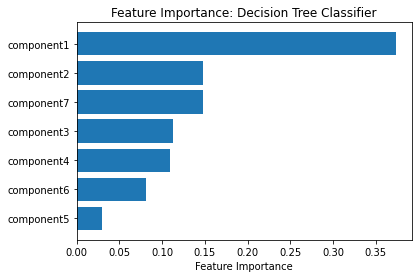

In [59]:
#finding what feature are important for classification
plt.figure(figsize=(6, 4))
sort = clf.feature_importances_.argsort()
plt.barh(x_train.columns[sort], clf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.title('Feature Importance: Decision Tree Classifier')

In [60]:
#predict class probabilities for model using test data
tree_proba = clf.predict_proba(x_test)

In [61]:
#getting AUC score
tree_auc = roc_auc_score(y_test, tree_proba, labels = [0,1,2,3,4,5,6,7,8,9], multi_class = 'ovr', average = 'macro')
print('One Vs Rest Macro Averaged AUC Score:', round(tree_auc, 3))

One Vs Rest Macro Averaged AUC Score: 0.848


#### Random Forest

In [122]:
# RF - Hyperparameter Tuning 
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
} 

random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid)

random_search.fit(x_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=10)


In [62]:
#training final rf model with optimal hyperparameters from tuning
rf = RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9, n_estimators=10,random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=10, random_state=42)

In [63]:
#predicting classes for test data
rf_pred = rf.predict(x_test)

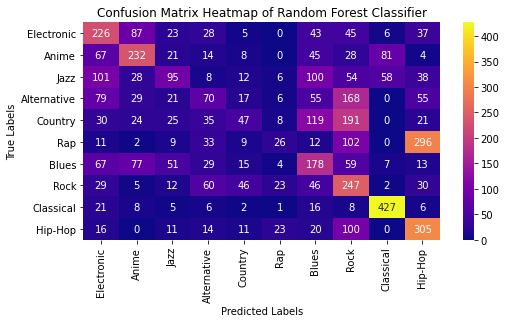

In [64]:
#confusion matrix heatmap
plt.figure(figsize = (8,4))
sns.heatmap(metrics.confusion_matrix(y_test, rf_pred), annot = True, xticklabels = label_names, yticklabels = label_names, cmap = 'plasma', fmt = 'g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Random Forest Classifier')
plt.show()

In [65]:
#confusion matrix
print(pd.crosstab(y_test, rf_pred, rownames=['Actual Genre'], colnames=['Predicted Genre']))

Predicted Genre    0    1   2   3   4   5    6    7    8    9
Actual Genre                                                 
0                226   87  23  28   5   0   43   45    6   37
1                 67  232  21  14   8   0   45   28   81    4
2                101   28  95   8  12   6  100   54   58   38
3                 79   29  21  70  17   6   55  168    0   55
4                 30   24  25  35  47   8  119  191    0   21
5                 11    2   9  33   9  26   12  102    0  296
6                 67   77  51  29  15   4  178   59    7   13
7                 29    5  12  60  46  23   46  247    2   30
8                 21    8   5   6   2   1   16    8  427    6
9                 16    0  11  14  11  23   20  100    0  305


In [66]:
#computing evaluation metrics
print('Evaluation Metrics for Random Forest Classifier')
print('Accuracy Score:', round(metrics.accuracy_score(y_test, rf_pred), 3))
print('Precision Score Macro Avg:', round(metrics.precision_score(y_test, rf_pred, average = 'macro'), 3))
print('Recall Score Macro Avg:', round(metrics.recall_score(y_test, rf_pred, average = 'macro'), 3))
print('F-1 Score Macro Avg:', round(metrics.f1_score(y_test, rf_pred, average = 'macro'), 3))

Evaluation Metrics for Random Forest Classifier
Accuracy Score: 0.371
Precision Score Macro Avg: 0.359
Recall Score Macro Avg: 0.371
F-1 Score Macro Avg: 0.341


Text(0.5, 1.0, 'Feature Importance: Random Forest')

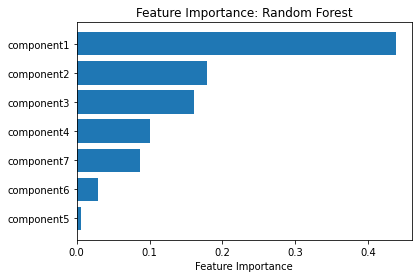

In [67]:
#finding what feature are important for classification
plt.figure(figsize=(6, 4))
sort = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.title('Feature Importance: Random Forest')

In [68]:
#predicting class probabilities for test data
rf_proba = rf.predict_proba(x_test)

In [69]:
#getting AUC score
rf_auc = roc_auc_score(y_test, rf_proba, labels = [0,1,2,3,4,5,6,7,8,9], multi_class = 'ovr', average = 'macro')
print('One Vs Rest Macro Averaged AUC Score:', round(rf_auc, 3))

One Vs Rest Macro Averaged AUC Score: 0.823


#### adaBoost 

In [70]:
#setting base classifier
dtclf = tree.DecisionTreeClassifier(max_depth=1)

In [135]:
#hyperparameter tuning
hyperparameter_space = {'n_estimators':[10, 20, 50, 100], 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

rs2 = RandomizedSearchCV(AdaBoostClassifier(estimator=dtclf), 
                        param_distributions = hyperparameter_space)

rs2.fit(x_train, y_train)
print("Optimal hyperparameter combination:", rs2.best_params_)

Optimal hyperparameter combination: {'n_estimators': 50, 'learning_rate': 0.6}


In [71]:
#training adaBoost model with optimal hyperparameters
bdt = AdaBoostClassifier(estimator=dtclf, n_estimators = 50, learning_rate = 0.6)
bdt.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6)

In [72]:
#getting class predictions for test dataset
bdt_pred = bdt.predict(x_test) 

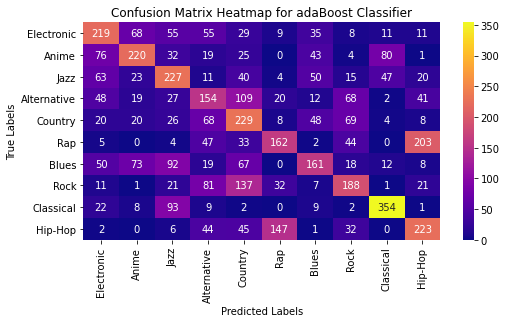

In [73]:
#confusion matrix heatmap
plt.figure(figsize = (8,4))
sns.heatmap(metrics.confusion_matrix(y_test, bdt_pred), annot = True, xticklabels = label_names, yticklabels = label_names, cmap = 'plasma', fmt = 'g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for adaBoost Classifier')
plt.show()

In [74]:
#confusion matrix
print(pd.crosstab(y_test, bdt_pred, rownames=['Actual Genre'], colnames=['Predicted Genre']))

Predicted Genre    0    1    2    3    4    5    6    7    8    9
Actual Genre                                                     
0                219   68   55   55   29    9   35    8   11   11
1                 76  220   32   19   25    0   43    4   80    1
2                 63   23  227   11   40    4   50   15   47   20
3                 48   19   27  154  109   20   12   68    2   41
4                 20   20   26   68  229    8   48   69    4    8
5                  5    0    4   47   33  162    2   44    0  203
6                 50   73   92   19   67    0  161   18   12    8
7                 11    1   21   81  137   32    7  188    1   21
8                 22    8   93    9    2    0    9    2  354    1
9                  2    0    6   44   45  147    1   32    0  223


In [75]:
#computing evaluation metrics
print('Evaluation Metrics for adaBoost Classifier')
print('Accuracy Score:', round(metrics.accuracy_score(y_test, bdt_pred), 3))
print('Precision Score Macro Avg:', round(metrics.precision_score(y_test, bdt_pred, average = 'macro'), 3))
print('Recall Score Macro Avg:', round(metrics.recall_score(y_test, bdt_pred, average = 'macro'), 3))
print('F-1 Score Macro Avg:', round(metrics.f1_score(y_test, bdt_pred, average = 'macro'), 3))

Evaluation Metrics for adaBoost Classifier
Accuracy Score: 0.427
Precision Score Macro Avg: 0.434
Recall Score Macro Avg: 0.427
F-1 Score Macro Avg: 0.427


Text(0.5, 1.0, 'Feature Importance: adaBoost')

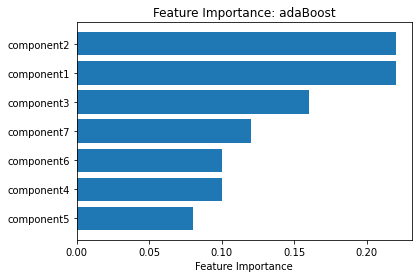

In [76]:
#finding what feature are importantfor classification
plt.figure(figsize=(6, 4))
sort = bdt.feature_importances_.argsort()
plt.barh(x_train.columns[sort], bdt.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.title('Feature Importance: adaBoost')

In [77]:
#getting class probabilites
bdt_proba = bdt.predict_proba(x_test)

In [78]:
#getting AUC score
bdt_auc = roc_auc_score(y_test, bdt_proba, labels = [0,1,2,3,4,5,6,7,8,9], multi_class = 'ovr', average = 'macro')
print('One Vs Rest Macro Averaged AUC Score:', round(bdt_auc, 3))

One Vs Rest Macro Averaged AUC Score: 0.801


### ROC Curves

In [79]:
#binarzing target variable from test data
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

(5000, 10)

In [80]:
#setting number of target outcomes
n_classes = 10

In [81]:
#list with label names for plotting
label_names = ['Electronic','Anime','Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop']

In [82]:
#converting the one vs rest macro average auc score into string variables
tree_auc_str = str(round(tree_auc, 3))
rf_auc_str = str(round(rf_auc, 3))
bdt_auc_str = str(round(bdt_auc, 3))

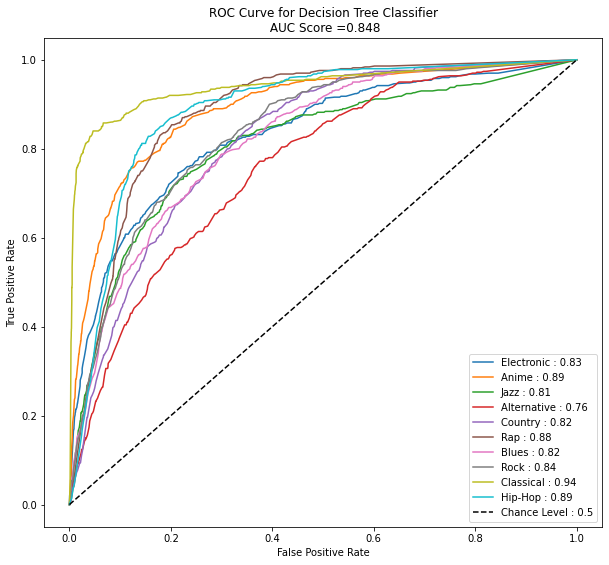

In [90]:
#DECISION TREE CLASSIFIER
#plotting roc curves for each class
plt.figure(figsize = (10,9))
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_onehot_test[:,i], tree_proba[:,i])
    auc = metrics.roc_auc_score(y_onehot_test[:,i], tree_proba[:,i])
    plt.plot(fpr,tpr, label = label_names[i]+" : "+str(round(auc, 2))) 
    
plt.plot([0, 1], [0, 1], "k--", label="Chance Level : 0.5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier\n AUC Score ='+tree_auc_str)
plt.legend(loc=4)
plt.show()

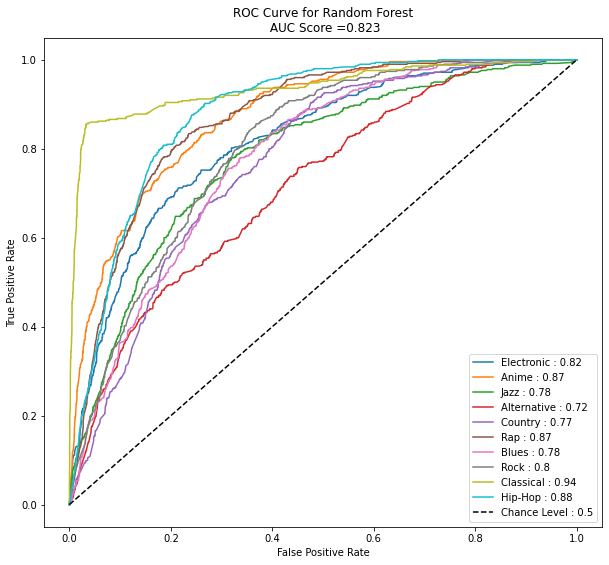

In [85]:
#RANDOM FOREST CLASSIFIER
#plotting roc curves for each class
plt.figure(figsize = (10,9))
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_onehot_test[:,i], rf_proba[:,i])
    auc = metrics.roc_auc_score(y_onehot_test[:,i], rf_proba[:,i])
    plt.plot(fpr,tpr, label = label_names[i]+" : "+str(round(auc, 2))) 
    
plt.plot([0, 1], [0, 1], "k--", label="Chance Level : 0.5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Random Forest\n AUC Score ='+rf_auc_str)
plt.legend(loc=4)
plt.show()

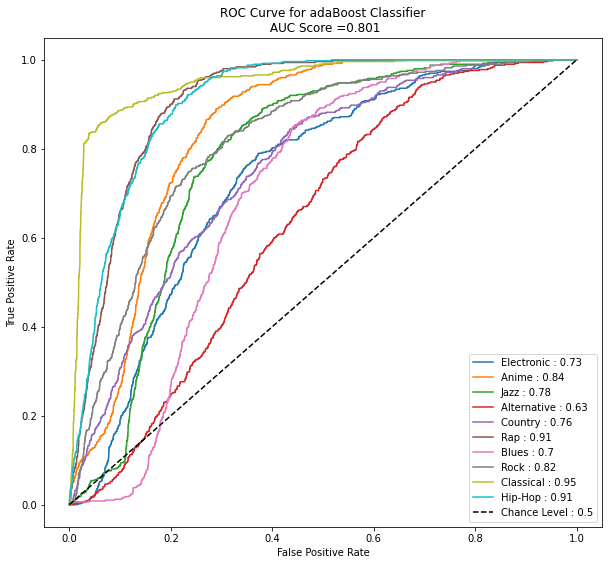

In [86]:
#ADABOOST CLASSIFIER
#plotting roc curves for each class
plt.figure(figsize = (10,9))
for i in range(n_classes):
    fpr, tpr, _ = metrics.roc_curve(y_onehot_test[:,i], bdt_proba[:,i])
    auc = metrics.roc_auc_score(y_onehot_test[:,i], bdt_proba[:,i])
    plt.plot(fpr,tpr, label = label_names[i]+" : "+str(round(auc, 2))) 
    
plt.plot([0, 1], [0, 1], "k--", label="Chance Level : 0.5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for adaBoost Classifier\n AUC Score ='+bdt_auc_str)
plt.legend(loc=4)
plt.show()